# Statistics on King County Data #

## Importing Data and Setting up ##

Let's import all the packages and functions we have in file `functions_1`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
path_to_src = os.path.join('../../', 'src')
sys.path.insert(0, path_to_src)
from functions_1 import *

Import data from the csv file created in the `eda_notebook`.

In [3]:
residential_df = pd.read_csv('../../data/processed/clean_merged_data.csv', dtype=str)
residential_df.head()

,DocumentDate,ExciseTaxNbr,Major,Minor,SalePrice,RecordingNbr,PropertyType,PrincipalUse,AFForestLand,AFCurrentUseLand,...,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,Condition
0,2019-12-20,3027422,213043,0120,560000.0,20191226000848,11,6,N,N,...,2,1,0,0,0,1989,0,0,0,3
1,2019-07-22,3002257,940652,0630,435000.0,20190730001339,11,6,N,N,...,1,0,1,0,0,1994,0,0,0,3
2,2019-06-04,2993601,140281,0020,450000.0,20190614000489,3,6,N,N,...,2,1,0,0,0,1986,0,0,0,3
3,2019-09-27,3015264,124550,0098,193000.0,20191015000395,3,6,N,N,...,1,0,1,0,0,1980,0,0,0,3
4,2019-03-27,2980648,797320,2320,540000.0,,3,6,N,N,...,1,1,0,0,0,1930,0,0,0,5


We want to know the house projects that will increase the value of a house. So for the sake of simplicity, we will concentrate on residential homes.

In [4]:
residential_df = residential_df[residential_df['PropertyType']=='11']
residential_df.head()

,DocumentDate,ExciseTaxNbr,Major,Minor,SalePrice,RecordingNbr,PropertyType,PrincipalUse,AFForestLand,AFCurrentUseLand,...,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,Condition
0,2019-12-20,3027422,213043,0120,560000.0,20191226000848,11,6,N,N,...,2,1,0,0,0,1989,0,0,0,3
1,2019-07-22,3002257,940652,0630,435000.0,20190730001339,11,6,N,N,...,1,0,1,0,0,1994,0,0,0,3
8,2019-04-04,2982060,347050,0040,648500.0,,11,6,N,N,...,2,1,0,0,0,2005,0,0,0,3
9,2019-10-30,3020690,345960,0230,1255000.0,20191114001849,11,6,N,N,...,1,0,1,0,1,1978,0,0,0,5
10,2019-03-04,2976405,030200,0645,380000.0,20190306000786,11,6,N,N,...,1,0,1,0,1,1963,0,0,0,2


We have chosen some of the columns that seem to have continuous data and we are choosing these to find which data is correlated with our target variable `SalePrice`.

In [5]:
continuous_data = ['SalePrice', 'SqFtLot', 'NbrLivingUnits', 'Stories',
              'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
              'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
              'SqFtTotLiving','SqFtTotBasement','SqFtFinBasement',
              'SqFtGarageBasement','SqFtGarageAttached','SqFtOpenPorch',
              'SqFtEnclosedPorch','SqFtDeck','Bedrooms','BathHalfCount',
              'Bath3qtrCount','BathFullCount','YrBuilt','YrRenovated',
              'PcntComplete','PcntNetCondition']

Since the data is in `str` format, we have to set it as a numerical value to get correlation. In this instance, we will set it as `float`.

In [6]:
residential_df = residential_df[continuous_data]
residential_df = residential_df.astype(float)

In [7]:
residential_df.describe()

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
count,1.880700e+04,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,...,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.000000,18807.00000,18807.000000,18807.000000,18807.000000
mean,7.968769e+05,15484.884617,1.009305,1.515127,1272.066784,45.922050,513.740469,12.960547,0.698144,0.539267,...,5.435263,136.979795,3.424682,0.483543,0.516138,1.578880,1974.66454,99.426490,0.300580,0.005370
std,5.910938e+05,39817.767674,0.108005,0.533691,500.122767,167.597449,661.340574,88.268310,23.828205,16.884691,...,36.728329,213.239317,0.923970,0.532005,0.655268,0.700675,30.42729,434.721742,4.950933,0.381457
min,1.000000e+01,375.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.00000,0.000000,0.000000,0.000000
25%,4.712590e+05,5048.500000,1.000000,1.000000,960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1954.00000,0.000000,0.000000,0.000000
50%,6.590000e+05,7600.000000,1.000000,1.500000,1210.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1978.00000,0.000000,0.000000,0.000000
75%,9.100000e+05,10800.000000,1.000000,2.000000,1499.000000,0.000000,1020.000000,0.000000,0.000000,0.000000,...,0.000000,220.000000,4.000000,1.000000,1.000000,2.000000,2001.00000,0.000000,0.000000,0.000000
max,1.605000e+07,897336.000000,3.000000,3.500000,6923.000000,2160.000000,5110.000000,1800.000000,1350.000000,920.000000,...,1840.000000,2250.000000,13.000000,5.000000,6.000000,7.000000,2020.00000,2020.000000,100.000000,40.000000


## Let's get the correlation ##

Let's make a correlation heatmap using `Seaborn's` handy plot.

<AxesSubplot:>

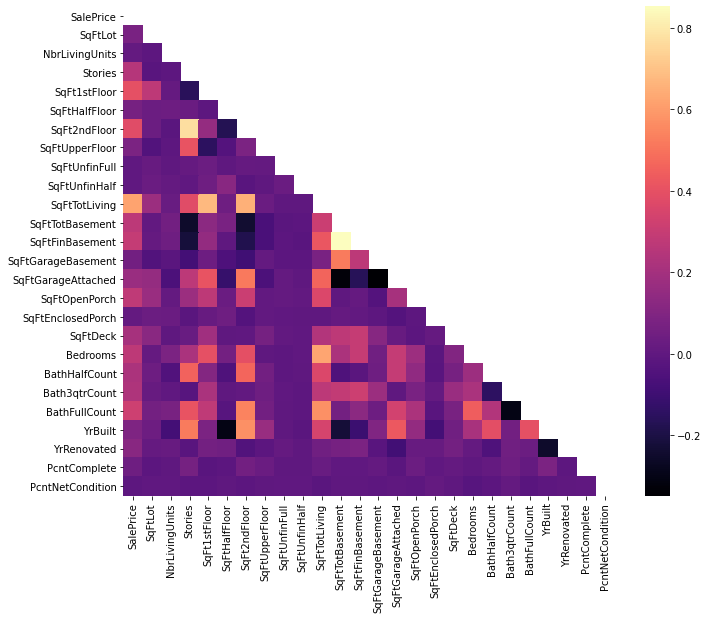

In [8]:
corr = residential_df.corr()

mask = np.triu(np.ones_like(corr, dtype=float))
fig1, ax1 = plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask = mask, ax=ax1, cmap='magma')

Using the heatmap, we can see thre are various features that seem to have some correlation with `SalePrice` based on color. But let's visualize the data using a pairplot.

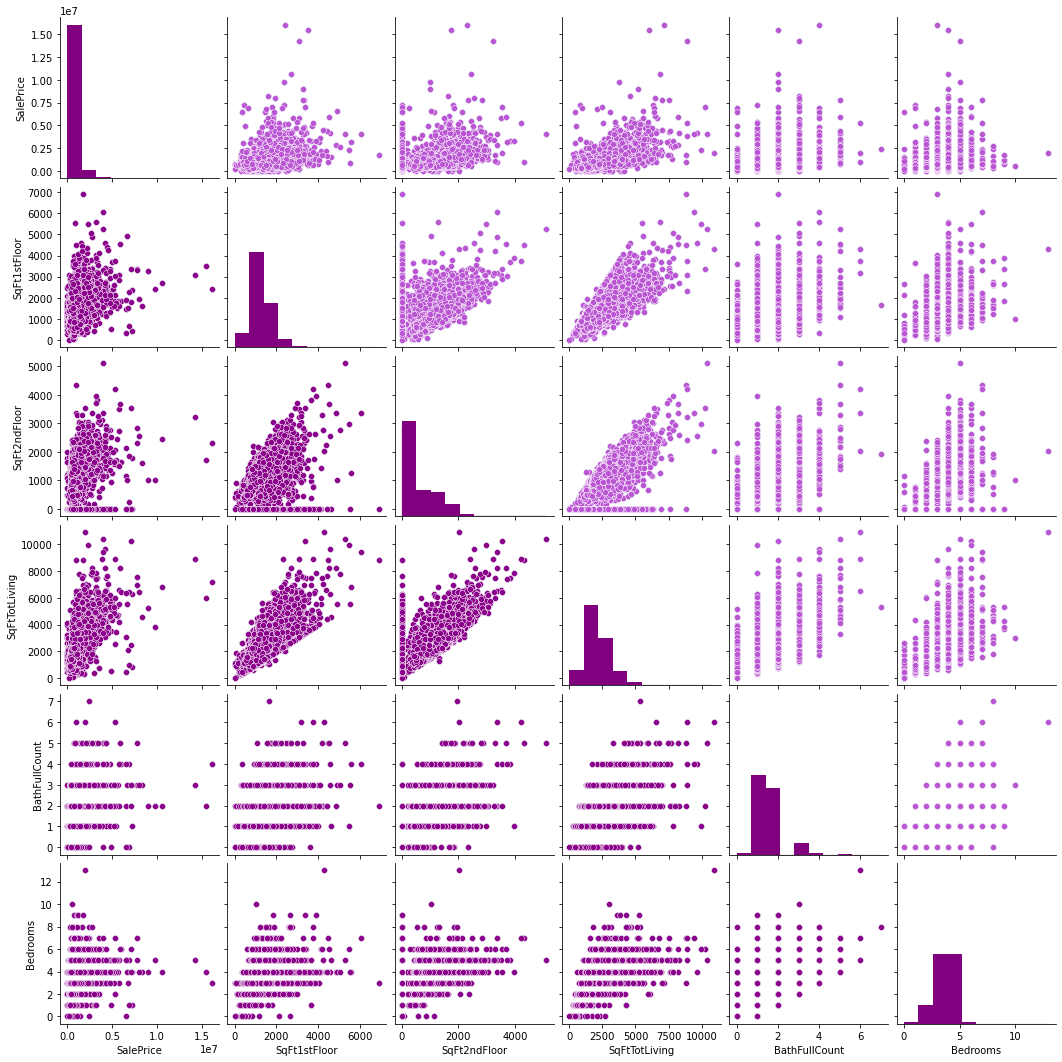

In [9]:
corr_columns = ['SalePrice','SqFt1stFloor','SqFt2ndFloor','SqFtTotLiving','BathFullCount','Bedrooms']
corr_df = residential_df[corr_columns]
g = sns.pairplot(corr_df)
g.map_upper(sns.scatterplot, color='mediumorchid')
g.map_lower(sns.scatterplot, color='darkmagenta')
g.map_diag(plt.hist, color= 'purple')


Since `BathFullCount` seems to be categorical or discreet. For the moment we will concentrate on the models of the continuous data.

## Simple Linear Models ##

### Model 1 ###

Using a predefined function `model`, we will get the ols model of different features and how it relates to the `SalePrice` variable.

In the first model we will be using `SqFtTotLiving`.

In [10]:
frml_sale_totsq = 'SalePrice ~ SqFtTotLiving'
single_linear_model = ols(formula =frml_sale_totsq, data = residential_df)
results_single_linear_model = single_linear_model.fit()
results_single_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:31:46   Log-Likelihood:            -2.7203e+05
No. Observations:               18807   AIC:                         5.441e+05
Df Residuals:                   18805   BIC:                         5.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.591e+04   8189.002     -1.942      0.052    -3.2e+04     144.477
SqFtTotLiving   378.6638      3.476    108.935      0.000     371.850     385.477
==============================================================================
Omnibus:                    24151.837   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12404873.130
Skew:                           6.729   Prob(JB):                         0.00
Kurtosis:                     128.096   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting ###

It appears that the `SqFtTotLiving` feature explains around 39% of the variance. The p-value is pretty small and the F-statistic seems to be fairly large. Therefore, we can conclude that our regression model fits the data better than the model with no independent variables.

Let's test the linear assumptions.

### Testing the Linear Assumptions ##

Let's run a statistical test to check Linearity. For this we will be using the rainbow test.

In [11]:
rainbow_statistic, rainbow_p_value = linear_rainbow(results_single_linear_model)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.8915712739934645
rainbow p-value: 0.9999999867230444


Since the rainbow p-value is greater than the .05 alpha, we fail to reject the null hypothesis and it means that we have a linear model.

Checking the normality assumption we can use the Jarque-Bera statistics which was rather high. However, since its p-value was 0, this also tells us that there is no significant evidence against the null hypothesis, therefore this model does not seem to have data that follows the normality assumption.

However, it is important to note that teh Jarque-Bera statistic will increase depending on the skewness and kurtosis of the model.

Let's check the **homoscadasticity**.


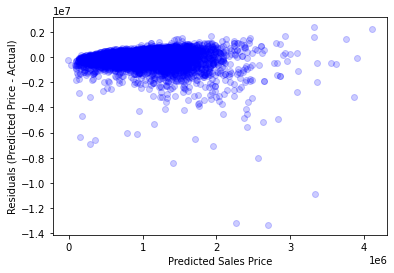

In [12]:
y = residential_df['SalePrice']
y_hat = results_single_linear_model.predict()
fig1, ax1 = plt.subplots()
ax1.set(xlabel = 'Predicted Sales Price',
        ylabel = 'Residuals (Predicted Price - Actual)')
ax1.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

It appears that there are some residuals that are doing their own thing starting at the $200,000 mark. We should check the residuals starting at predicted Sales Price at or bigger than 2 million. We will investigate up next.

Since we are only checking the assumptions of 1 single feature, we can say that this item is independent.

In [13]:
residential_df

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
0,560000.0,10523.0,1.0,1.0,1930.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,1989.0,0.0,0.0,0.0
1,435000.0,7392.0,1.0,2.0,1057.0,0.0,918.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,2.0,1.0,1994.0,0.0,0.0,0.0
8,648500.0,5250.0,1.0,2.0,1390.0,0.0,1910.0,0.0,0.0,0.0,...,0.0,0.0,5.0,1.0,0.0,2.0,2005.0,0.0,0.0,0.0
9,1255000.0,10500.0,1.0,1.0,1760.0,0.0,0.0,0.0,0.0,0.0,...,330.0,790.0,4.0,0.0,2.0,1.0,1978.0,0.0,0.0,0.0
10,380000.0,45303.0,1.0,1.5,920.0,370.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,1.0,1963.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29938,442000.0,6380.0,1.0,1.0,1430.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,4.0,1.0,0.0,2.0,1944.0,0.0,0.0,0.0
29939,680000.0,9960.0,1.0,1.0,1520.0,0.0,0.0,0.0,0.0,0.0,...,0.0,450.0,3.0,0.0,1.0,1.0,1958.0,0.0,0.0,0.0
29940,745000.0,6800.0,1.0,2.0,840.0,0.0,1410.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,2.0,1947.0,2009.0,0.0,0.0
29941,6500000.0,28657.0,1.0,2.5,1880.0,700.0,2140.0,0.0,0.0,0.0,...,0.0,640.0,5.0,1.0,1.0,4.0,1903.0,2012.0,0.0,0.0


In [14]:
residential_df[residential_df['SalePrice'] >= 2000000].sort_values('SalePrice', ascending = False)

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
733,16050000.0,26225.0,1.0,2.0,2420.0,0.0,2300.0,0.0,0.0,0.0,...,0.0,450.0,3.0,2.0,2.0,4.0,1996.0,0.0,0.0,0.0
13247,15425000.0,50243.0,1.0,2.0,3510.0,0.0,1730.0,0.0,0.0,0.0,...,0.0,40.0,4.0,1.0,2.0,2.0,1925.0,1990.0,0.0,0.0
22313,14250000.0,26365.0,1.0,2.0,3070.0,0.0,3210.0,0.0,0.0,0.0,...,0.0,0.0,5.0,2.0,2.0,3.0,1998.0,0.0,0.0,0.0
24138,10580000.0,40463.0,1.0,2.0,2700.0,0.0,2450.0,0.0,0.0,0.0,...,0.0,490.0,4.0,1.0,3.0,2.0,1928.0,0.0,0.0,0.0
9644,9800000.0,39303.0,1.0,2.0,2390.0,0.0,1000.0,0.0,0.0,0.0,...,0.0,110.0,5.0,0.0,1.0,2.0,1902.0,1999.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,2000000.0,4103.0,1.0,2.0,1390.0,0.0,1430.0,0.0,0.0,0.0,...,0.0,300.0,3.0,2.0,0.0,2.0,2008.0,0.0,0.0,0.0
23242,2000000.0,18409.0,1.0,2.0,2180.0,0.0,950.0,0.0,0.0,0.0,...,0.0,370.0,5.0,1.0,3.0,1.0,1966.0,0.0,0.0,0.0
23912,2000000.0,7203.0,1.0,2.0,1630.0,0.0,1650.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,2.0,2.0,2016.0,0.0,0.0,0.0
12609,2000000.0,26037.0,1.0,2.0,1080.0,0.0,1440.0,0.0,0.0,0.0,...,0.0,150.0,3.0,1.0,0.0,2.0,2006.0,0.0,0.0,0.0


In [15]:
residential_df[(residential_df['SalePrice'] < 2000000) & (residential_df['YrBuilt'] <= 2000)].value_counts('YrBuilt')

YrBuilt
1968.0    333
1977.0    332
1967.0    326
1978.0    316
1987.0    283
         ... 
1934.0     25
1902.0     22
1933.0     20
1935.0     19
1901.0     16
Length: 101, dtype: int64

It appears that most of the houses over the price of `$2000000` were built at or before the year 2000. since the prices of houses make up only 3 percent of the total data, we will remove it as outlier information.

In [16]:
residential_df = residential_df[residential_df['SalePrice'] < 2000000]

In [17]:
residential_df

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
0,560000.0,10523.0,1.0,1.0,1930.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,1989.0,0.0,0.0,0.0
1,435000.0,7392.0,1.0,2.0,1057.0,0.0,918.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,2.0,1.0,1994.0,0.0,0.0,0.0
8,648500.0,5250.0,1.0,2.0,1390.0,0.0,1910.0,0.0,0.0,0.0,...,0.0,0.0,5.0,1.0,0.0,2.0,2005.0,0.0,0.0,0.0
9,1255000.0,10500.0,1.0,1.0,1760.0,0.0,0.0,0.0,0.0,0.0,...,330.0,790.0,4.0,0.0,2.0,1.0,1978.0,0.0,0.0,0.0
10,380000.0,45303.0,1.0,1.5,920.0,370.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,1.0,1963.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29935,395000.0,6791.0,1.0,1.0,1460.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,1994.0,0.0,0.0,0.0
29936,1250000.0,10115.0,1.0,2.0,1916.0,0.0,2101.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,1.0,2.0,2015.0,0.0,0.0,0.0
29938,442000.0,6380.0,1.0,1.0,1430.0,0.0,0.0,0.0,0.0,0.0,...,0.0,200.0,4.0,1.0,0.0,2.0,1944.0,0.0,0.0,0.0
29939,680000.0,9960.0,1.0,1.0,1520.0,0.0,0.0,0.0,0.0,0.0,...,0.0,450.0,3.0,0.0,1.0,1.0,1958.0,0.0,0.0,0.0


In [18]:
frml_sale_totsq = 'SalePrice ~ SqFtTotLiving'
single_linear_model = ols(formula =frml_sale_totsq, data = residential_df)
results_single_linear_model = single_linear_model.fit()
results_single_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:31:58   Log-Likelihood:            -2.5339e+05
No. Observations:               18181   AIC:                         5.068e+05
Df Residuals:                   18179   BIC:                         5.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.241e+05   5266.783     42.548      0.000    2.14e+05    2.34e+05
SqFtTotLiving   239.6283      2.345    102.168      0.000     235.031     244.226
==============================================================================
Omnibus:                     2007.243   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3294.793
Skew:                           0.782   Prob(JB):                         0.00
Kurtosis:                       4.379   Cond. No.                     5.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

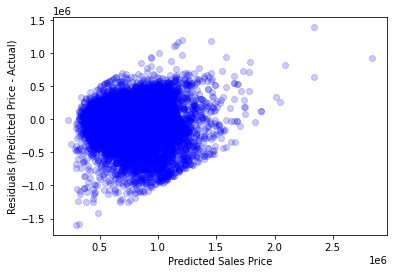

In [19]:
y = residential_df['SalePrice']
y_hat = results_single_linear_model.predict()
fig2, ax2 = plt.subplots()
ax2.set(xlabel = 'Predicted Sales Price',
        ylabel = 'Residuals (Predicted Price - Actual)')
ax2.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

It appears that the data is homoscedastic due to the linear nature of the data points.

In [20]:
rainbow_statistic, rainbow_p_value = linear_rainbow(results_single_linear_model)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.960689448117647
rainbow p-value: 0.972037863704946


Since the rainbow p-value is greater than the .05 alpha, we fail to reject the null hypothesis and it means that we have a linear model.

With the large SalePrice values out of the way, we have a smaller JB value which shows we are reaching closer to normality distribution.

Using the cleaned up data we can create our multiple feature regression model.

## Multiple Linear Model ##

In [21]:
sale_sqft_formula = 'SalePrice ~ SqFtTotLiving + SqFtOpenPorch'
multiple_linear_model = ols(formula = sale_sqft_formula, data = residential_df)
results_multiple_linear_model = multiple_linear_model.fit()
results_multiple_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     5236.
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:32:11   Log-Likelihood:            -2.5338e+05
No. Observations:               18181   AIC:                         5.068e+05
Df Residuals:                   18178   BIC:                         5.068e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.266e+05   5290.968     42.833      0.000    2.16e+05    2.37e+05
SqFtTotLiving   236.0566      2.463     95.851      0.000     231.229     240.884
SqFtOpenPorch    71.9016     15.205      4.729      0.000      42.098     101.706
==============================================================================
Omnibus:                     2000.255   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3275.378
Skew:                           0.781   Prob(JB):                         0.00
Kurtosis:                       4.372   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Initial takeaways ###

The first thing we can see from this model and the previous model, the R-squared did not increase all that much. However, the rest of the statistics and coefficients look promising in terms of of a statistical difference. The T-statistic seems to be greater than 0 and the p-values also are at 0.

The F-statistic also seems to indicate that the fit of this model is statitically significant.

As we can see from the statistics the model has, this model has a _Skewness and Kurtosis_ is close to the shape of a normal distribution.

### Testing the Linearity Assumptions for the Model ###

In [22]:
rainbow_statistic, rainbow_p_value = linear_rainbow(results_multiple_linear_model)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.9593811659696331
rainbow p-value: 0.9759523197895068


Based on the large p-value, we fail to reject the null hypothesus and we can conclude that this model does not violate the linearity assumptions.

Let's check the **homoscadasticity.**

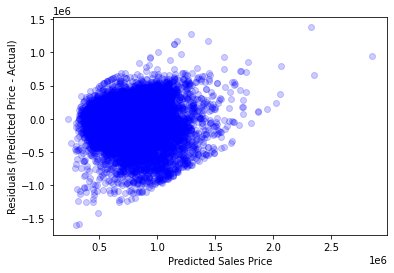

In [23]:
y = residential_df['SalePrice']
y_hat = results_multiple_linear_model.predict()
fig1, ax1 = plt.subplots()
ax1.set(xlabel = 'Predicted Sales Price',
        
        ylabel = 'Residuals (Predicted Price - Actual)')
ax1.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

The data appears to follow the same pathing as the single model that was refined. However is appears that the homoscedasticity assumption is not met.

Let's run a statistical test to verify.

In [24]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, residential_df[['SqFtTotLiving','SqFtOpenPorch']])
print('Lagrange Multiplier p-value:', lm_p_value)
print('F-statistic p_value:', f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p_value: 0.0


It appears as though, statistically speaking, the distribution is not homoscedastic and therefore violates this assumption. The data is heteroscedastic.

## Filtering Data ##

Let's filter the data to a single year to verify if the yearly rise of house prices has an effect on the homo/heteroscedasticity.

In [25]:
residential_df.YrBuilt.value_counts()

2018.0    598
2019.0    341
1968.0    333
1977.0    332
1967.0    326
         ... 
1902.0     22
1933.0     20
1935.0     19
1901.0     16
2020.0     14
Name: YrBuilt, Length: 121, dtype: int64

Since the year 2018 has the most data counts, let's use that year to refine and build the new model.

In [26]:
residential_df = residential_df[residential_df['YrBuilt']== 2018]

In [27]:
residential_df.head()

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition
15,1450000.0,6000.0,1.0,2.5,930.0,460.0,1520.0,0.0,0.0,0.0,...,0.0,500.0,4.0,2.0,0.0,3.0,2018.0,0.0,0.0,0.0
16,1450000.0,6000.0,1.0,2.0,490.0,0.0,490.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,2018.0,0.0,0.0,0.0
32,475000.0,3934.0,1.0,2.0,860.0,0.0,1320.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,1.0,2018.0,0.0,0.0,0.0
46,1850000.0,14400.0,1.0,2.0,1850.0,0.0,2060.0,0.0,0.0,0.0,...,0.0,0.0,5.0,1.0,1.0,3.0,2018.0,0.0,0.0,0.0
233,599950.0,5116.0,1.0,2.0,950.0,0.0,1568.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,0.0,2.0,2018.0,0.0,0.0,0.0


In [31]:
sale_sqft_formula = 'SalePrice ~ SqFtTotLiving + SqFtOpenPorch'
refined_multiple_linear_model = ols(formula = sale_sqft_formula, data = residential_df)
refined_results_multiple_linear_model = refined_multiple_linear_model.fit()
refined_results_multiple_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           8.61e-73
Time:                        18:08:16   Log-Likelihood:                -8365.3
No. Observations:                 598   AIC:                         1.674e+04
Df Residuals:                     595   BIC:                         1.675e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.814e+05   3.33e+04      8.459      0.000    2.16e+05    3.47e+05
SqFtTotLiving   271.1511     15.510     17.483      0.000     240.691     301.612
SqFtOpenPorch  -151.3640    106.292     -1.424      0.155    -360.117      57.389
==============================================================================
Omnibus:                       45.065   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.251
Skew:                           0.535   Prob(JB):                     2.05e-16
Kurtosis:                       4.324   Cond. No.                     7.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that our R-squared has improved a bit. Our JB seems to be well as well, so it follows our normality assumptions.

In [32]:
rainbow_statistic, rainbow_p_value = linear_rainbow(refined_results_multiple_linear_model)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.915317058002411
rainbow p-value: 0.7771423413742804


Based on the large p-value, we fail to reject the null hypothesus and we can conclude that this model does not violate the linearity assumptions.

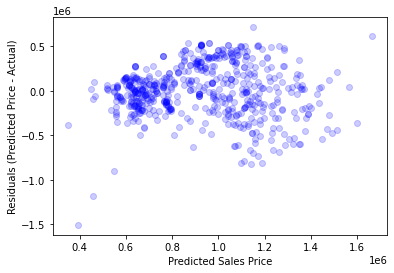

In [33]:
y = residential_df['SalePrice']
y_hat = refined_results_multiple_linear_model.predict()
fig1, ax1 = plt.subplots()
ax1.set(xlabel = 'Predicted Sales Price',
        
        ylabel = 'Residuals (Predicted Price - Actual)')
ax1.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

In [34]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, residential_df[['SqFtTotLiving','SqFtOpenPorch']])
print('Lagrange Multiplier p-value:', lm_p_value)
print('F-statistic p_value:', f_p_value)

Lagrange Multiplier p-value: 1.7904669711230754e-34
F-statistic p_value: 4.389407792373555e-38


Since the p_value is so small the data appears to be heteroscedastic.

## Feature Engineering Model ##

Let' add all the non-living spaces square feet to see if it has an impact on the model and see if it follows the assumptions.

In [36]:
residential_df['non_living_SqFt'] = residential_df['SqFtGarageAttached'] + residential_df['SqFtOpenPorch'] + residential_df['SqFtEnclosedPorch'] + residential_df['SqFtDeck'] + residential_df['SqFtGarageBasement']

<ipython-input-36-35de9cd295ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['non_living_SqFt'] = residential_df['SqFtGarageAttached'] + residential_df['SqFtOpenPorch'] + residential_df['SqFtEnclosedPorch'] + residential_df['SqFtDeck'] + residential_df['SqFtGarageBasement']


In [37]:
residential_df[['non_living_SqFt', 'SqFtTotLiving']]

,non_living_SqFt,SqFtTotLiving
15,1000.0,2910.0
16,0.0,980.0
32,530.0,2180.0
46,920.0,3910.0
233,672.0,2518.0
...,...,...
29656,567.0,2525.0
29667,510.0,1780.0
29735,530.0,2400.0
29832,1040.0,4010.0


In [39]:
living_and_nonliving_formula = 'SalePrice ~ SqFtTotLiving + non_living_SqFt'
multiple_linear_model2 = ols(formula = living_and_nonliving_formula, data = residential_df)
results_multiple_linear_model2 = multiple_linear_model2.fit()
results_multiple_linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     221.4
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.31e-72
Time:                        18:27:46   Log-Likelihood:                -8365.7
No. Observations:                 598   AIC:                         1.674e+04
Df Residuals:                     595   BIC:                         1.675e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.899e+05   3.22e+04      8.995      0.000    2.27e+05    3.53e+05
SqFtTotLiving     246.3674     15.999     15.399      0.000     214.947     277.788
non_living_SqFt    52.5375     48.080      1.093      0.275     -41.890     146.965
==============================================================================
Omnibus:                       42.741   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.263
Skew:                           0.524   Prob(JB):                     4.08e-15
Kurtosis:                       4.249   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The normality assumptions don't seem to be way off and teh JB value seem to be lower than the previous model. The p-values appear to be low which is great for our model.

In [40]:
rainbow_statistic, rainbow_p_value = linear_rainbow(results_multiple_linear_model2)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.9298157281459004
rainbow p-value: 0.734734137766941


Based on the large p-value, we fail to reject the null hypothesus and we can conclude that this model does not violate the linearity assumptions.

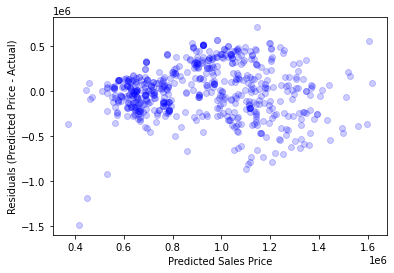

In [41]:
y = residential_df['SalePrice']
y_hat = results_multiple_linear_model2.predict()
fig1, ax1 = plt.subplots()
ax1.set(xlabel = 'Predicted Sales Price',
        
        ylabel = 'Residuals (Predicted Price - Actual)')
ax1.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

In [42]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, residential_df[['SqFtTotLiving','non_living_SqFt']])
print('Lagrange Multiplier p-value:', lm_p_value)
print('F-statistic p_value:', f_p_value)

Lagrange Multiplier p-value: 9.082268498370455e-35
F-statistic p_value: 1.787622335061917e-38


Because of the very low p-value we fail to reject the null hypothesis and deem this data to be heteroscedastic.

## Logged Data Model ##

Let's see if we can imporve the very similar statistics and very similar scatter plot of residuals by logging the `non_living_SqFt`column. in order to do this we will have to drop the columns that have 0 Square Feet to prevent an error.

In [43]:
residential_df = residential_df[residential_df['non_living_SqFt']!=0]

In [44]:
residential_df

,SalePrice,SqFtLot,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,...,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,non_living_SqFt
15,1450000.0,6000.0,1.0,2.5,930.0,460.0,1520.0,0.0,0.0,0.0,...,500.0,4.0,2.0,0.0,3.0,2018.0,0.0,0.0,0.0,1000.0
32,475000.0,3934.0,1.0,2.0,860.0,0.0,1320.0,0.0,0.0,0.0,...,0.0,3.0,1.0,1.0,1.0,2018.0,0.0,0.0,0.0,530.0
46,1850000.0,14400.0,1.0,2.0,1850.0,0.0,2060.0,0.0,0.0,0.0,...,0.0,5.0,1.0,1.0,3.0,2018.0,0.0,0.0,0.0,920.0
233,599950.0,5116.0,1.0,2.0,950.0,0.0,1568.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,2.0,2018.0,0.0,0.0,0.0,672.0
275,676000.0,6428.0,1.0,2.0,1482.0,0.0,1689.0,0.0,0.0,0.0,...,0.0,5.0,1.0,0.0,3.0,2018.0,0.0,0.0,0.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29656,664950.0,4000.0,1.0,2.0,1010.0,0.0,1515.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,2.0,2018.0,0.0,0.0,0.0,567.0
29667,695000.0,942.0,1.0,2.0,640.0,0.0,570.0,0.0,0.0,0.0,...,420.0,3.0,1.0,1.0,1.0,2018.0,0.0,0.0,0.0,510.0
29735,968990.0,3408.0,1.0,2.0,1020.0,0.0,1380.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,2.0,2018.0,0.0,0.0,0.0,530.0
29832,1195000.0,6004.0,1.0,2.0,1630.0,0.0,1580.0,0.0,0.0,0.0,...,0.0,5.0,1.0,1.0,2.0,2018.0,0.0,0.0,0.0,1040.0


In [45]:
residential_df['non_living_SqFt'] = np.log(residential_df['non_living_SqFt'])

<ipython-input-45-47dcbc7fcc16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['non_living_SqFt'] = np.log(residential_df['non_living_SqFt'])


In [46]:
living_and_nonliving_formula = 'SalePrice ~ SqFtTotLiving + non_living_SqFt'
multiple_linear_model2_log = ols(formula = living_and_nonliving_formula, data = residential_df)
results_multiple_linear_model2_log = multiple_linear_model2_log.fit()
results_multiple_linear_model2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     231.4
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.04e-74
Time:                        18:27:53   Log-Likelihood:                -8189.4
No. Observations:                 586   AIC:                         1.638e+04
Df Residuals:                     583   BIC:                         1.640e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.95e+05   1.11e+05      1.752      0.080   -2.36e+04    4.14e+05
SqFtTotLiving     258.0645     14.648     17.618      0.000     229.296     286.833
non_living_SqFt  1.512e+04   2.01e+04      0.754      0.451   -2.43e+04    5.45e+04
==============================================================================
Omnibus:                       26.362   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.831
Skew:                           0.390   Prob(JB):                     1.01e-08
Kurtosis:                       3.948   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
rainbow_statistic, rainbow_p_value = linear_rainbow(results_multiple_linear_model2_log)
print('rainbow statistic: ', rainbow_statistic)
print('rainbow p-value:', rainbow_p_value)

rainbow statistic:  0.9494284383001311
rainbow p-value: 0.6710529679475703


Based on the large p-value, we fail to reject the null hypothesus and we can conclude that this model does not violate the linearity assumptions.

### Homoscedastic Assumption ###

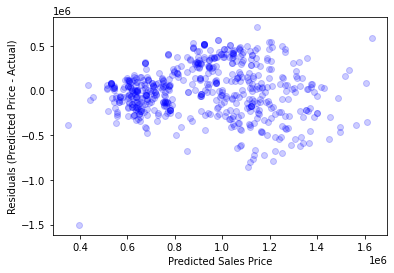

In [61]:
y = residential_df['SalePrice']
y_hat = results_multiple_linear_model2_log.predict()
fig1, ax1 = plt.subplots()
ax1.set(xlabel = 'Predicted Sales Price',
        
        ylabel = 'Residuals (Predicted Price - Actual)')
ax1.scatter(x=y_hat, y=y_hat-y, color='blue', alpha=0.2)

In [62]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, residential_df[['SqFtTotLiving','non_living_SqFt']])
print('Lagrange Multiplier p-value:', lm_p_value)
print('F-statistic p_value:', f_p_value)

Lagrange Multiplier p-value: 2.599256812237709e-38
F-statistic p_value: 2.034530484163471e-43


There was little to no discernable difference on the  logged data between the residuals and its homoscedasticity. This model still fails the homoscedastic assumption.

# Summary #

We started off with a base model of SalePrice ~ SqFtTotLiving. It described about 38% of the data and has great p-values under .05. The model seemed statistically significant in its coefficients. In the model we learned that for every Square foot added the price of a house, would on average increase approximately $378.

Note, no years had been filtered.

After checking the linearity assumptions, it was revealed that though there was no violation of the  normality or linearity assumption, the data violated the homoscedasticity assumption. 

We tried to correct this by filtering outlier data and removing all houses that had a price larger than 2 million. This definitely had an effect on our model since, after running the code again, we got a slightly lower r-squared of .366. The p-values remained low and the t-value seemed to indicate that our coefficients were statistically significant. 

I once again ran the homoscedastic test and scatter plot and this time we got different results. the scatter plot seemed more linear but on a slope and the statistical test after seemed to indicate that we failed to reject the null hypothesis and therefore our data was not homoscedastic.

In the third model, using the same dataFrame, we added the feature SqFtOpenPorch. When we ran our model, we got an r-squared of .366. However, the rest of the statistics and coefficients look promising in terms of of a statistical difference. The T-statistic seems to be greater than 0 and the p-values also are at 0. The F-statistic also seems to indicate that the fit of this model is statistically significant. As we can see from the statistics the model has, this model has a *Skewness and Kurtosis* is close to the shape of a normal distribution.

As we ran the homoscedasticity test, I noticed that the scatter plot looked almost identical to the previous test. In order to account for this failed assumption, I decided to filter the data of houses of year built to a single Year.

The 4th model was built on top of the 3rd model, this time we used only data from houses built in 2018. After running the model, we got an increase in the r-squared of .428 which means that the model described approximately 43% of the variance in house prices. The p-value for the SqFtOpenPorch seem to show that the p-value is large than .05 and thus it appears that there is strong evidence to fail to reject our null hypothesis. This tells us that there is  higher probability of the data not being statistically significant.

However, the SqFtTotLiving data point still appears to be smaller than .05 and therefore it provides support to reject our null hypothesis.

After running our tests for normality and linearity it appeared to not violate those assumptions. However, the data was still not homoscedastic.

In order to try to account for this, we built the 5th data model that had a lot of the non-living total square feet area in total and added it to a column. Then we removed the SqFtOpenPorch because the values under that column were added to non_living_SqFt column. 

After we ran the model we found that the R-squared stayed relatively the same. It's normality and linearity assumptions passed however we get the same problem with the homoscedastic assumptions. 

Then we come to the 6th model where in this case, the non_living_SqFt is logged and the values that were 0 were removed. The model of this data showed an increase in the R-Squared to .044 the p-value on the non_living_SqFt coefficient appeared to be larger than the .05 suggesting that  we fail to reject the null hypothesis once again. The SqFtTotLiving remained having a low p-value.

Once again, the normality and linearity assumptions were met. However once again, the homoscedastic assumption was not met.

## Conclusion ##